### Intersection Types

In [1]:
trait T1 { val a: Int = 0 }
trait T2 { val b: Int = 0 }
type T = T1 with T2

defined trait T1
defined trait T2
defined type T

In [2]:
typeOf[T] <:< typeOf[T1]
typeOf[T] <:< typeOf[T2]

res1_0: Boolean = true
res1_1: Boolean = true

#### Permutation

In [3]:
typeOf[T1 with T2] <:< typeOf[T2 with T1]
typeOf[T2 with T1] <:< typeOf[T1 with T2]

res2_0: Boolean = true
res2_1: Boolean = true

#### Width

In [4]:
typeOf[T1 with T2] <:< typeOf[T2]
typeOf[T1 with T2] <:< typeOf[T1]

res3_0: Boolean = true
res3_1: Boolean = true

#### Depth

In [5]:
trait T3 extends T2 { override val b: Int = 2 }
typeOf[T1 with T3] <:< typeOf[T1 with T2]

defined trait T3
res4_1: Boolean = true

### Stacking with Traits
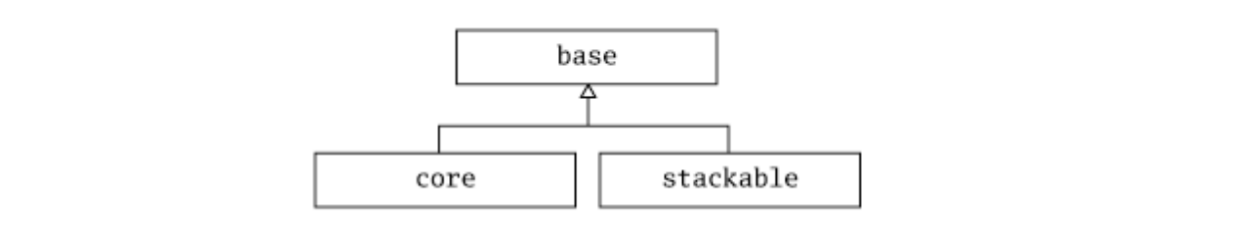

In [6]:
trait Stack[A] {
    def get(): (A, Stack[A])
    def put(x: Int): Stack[A]
}

class BasicIntStack protected (xs: List[Int]) extends Stack[Int] {
    def this() = this(Nil)
    def get() = (xs.head, new BasicIntStack(xs.tail))
    def put(x: Int) = new BasicIntStack(x :: xs)
}

val stack = new BasicIntStack().put(1)
stack.get

defined trait Stack
defined class BasicIntStack
stack: BasicIntStack = ammonite.$sess.cmd5$Helper$BasicIntStack@389ee810
res5_3: (Int, BasicIntStack) = (
  1,
  ammonite.$sess.cmd5$Helper$BasicIntStack@7ba14052
)

In [7]:
trait Doubling extends Stack[Int] {
    // why abstract? super.put not exists, not to indicate core as super
    // not in compile-time, in run-time constructor (super while post-order traversal)
    // extends with with ...
    abstract override def put(x: Int): Stack[Int] = super.put(2 * x)
}

trait Incrementing extends Stack[Int] {
    abstract override def put(x: Int): Stack[Int] = super.put(x+ 1)
}

trait Filtering extends Stack[Int] {
    abstract override def put(x: Int): Stack[Int] = {
        if(x >= 0) super.put(x)
        else this
    }
}

defined trait Doubling
defined trait Incrementing
defined trait Filtering

In [8]:
class BasicIntStack protected (xs: List[Int]) extends Stack[Int] {
    def this() = this(Nil)
    def get() = (xs.head, new BasicIntStack(xs.tail))
    // indicate Stack[Int]
    def put(x: Int): Stack[Int] = new BasicIntStack(x :: xs)
}

defined class BasicIntStack

In [9]:
class DStack protected (xs: List[Int]) extends BasicIntStack(xs) with Doubling {
    def this() = this(Nil)
    // How to call DStack constructor
}

// correct
new DStack().put(3).get

// wrong
new DStack().put(3).put(4).get

defined class DStack
res8_1: (Int, Stack[Int]) = (
  6,
  ammonite.$sess.cmd7$Helper$BasicIntStack@346b480
)
res8_2: (Int, Stack[Int]) = (
  4,
  ammonite.$sess.cmd7$Helper$BasicIntStack@6408a577
)

#### *To make it correct?*

In [10]:
class BasicIntStack protected (xs: List[Int]) extends Stack[Int] {
    def this() = this(Nil)
    def get() = (xs.head, new BasicIntStack(xs.tail))
    def mkStack(_xs: List[Int]) = new BasicIntStack(_xs)
    def put(x: Int): Stack[Int] = mkStack(x :: xs)
}

class DStack protected (xs: List[Int]) extends BasicIntStack(xs) with Doubling {
    def this() = this(Nil)
    override def mkStack(_xs: List[Int]) = new DStack(_xs)
}

// correct
new DStack().put(3).get
new DStack().put(3).put(4).get

// wrong
new DStack().put(3).get._2.put(2).get

defined class BasicIntStack
defined class DStack
res9_2: (Int, Stack[Int]) = (
  6,
  ammonite.$sess.cmd9$Helper$BasicIntStack@4140e168
)
res9_3: (Int, Stack[Int]) = (
  8,
  ammonite.$sess.cmd9$Helper$BasicIntStack@64269c70
)
res9_4: (Int, Stack[Int]) = (
  2,
  ammonite.$sess.cmd9$Helper$BasicIntStack@49a92781
)

In [11]:
class BasicIntStack protected (xs: List[Int]) extends Stack[Int] {
    def this() = this(Nil)
    def mkStack(_xs: List[Int]) = new BasicIntStack(_xs)
    def get() = (xs.head, mkStack(xs.tail))
    def put(x: Int): Stack[Int] = mkStack(x :: xs)
}

class DStack protected (xs: List[Int]) extends BasicIntStack(xs) with Doubling {
    def this() = this(Nil)
    override def mkStack(_xs: List[Int]) = new DStack(_xs)
}

// correct
new DStack().put(3).get
new DStack().put(3).put(4).get
new DStack().put(3).get._2.put(2).get

defined class BasicIntStack
defined class DStack
res10_2: (Int, Stack[Int]) = (6, ammonite.$sess.cmd10$Helper$DStack@5b07af7e)
res10_3: (Int, Stack[Int]) = (8, ammonite.$sess.cmd10$Helper$DStack@2c1016dd)
res10_4: (Int, Stack[Int]) = (4, ammonite.$sess.cmd10$Helper$DStack@28e01f97)

### Doubling Incrementing Filtering Stack

In [12]:
class DIFStack protected (xs: List[Int]) extends BasicIntStack(xs) with Doubling with Incrementing with Filtering {
    def this() = this(Nil)
    override def mkStack(_xs: List[Int]) = new DIFStack(_xs)
}

new DIFStack().put(3).get
new DIFStack().put(3).put(-1).get
new DIFStack().put(3).get._2.put(1).get

defined class DIFStack
res11_1: (Int, Stack[Int]) = (8, ammonite.$sess.cmd11$Helper$DIFStack@7f99bf89)
res11_2: (Int, Stack[Int]) = (8, ammonite.$sess.cmd11$Helper$DIFStack@2411a9a8)
res11_3: (Int, Stack[Int]) = (4, ammonite.$sess.cmd11$Helper$DIFStack@605f6b52)